<h2 style="color:black" align="center">Linear Regression With Multiple Variables</h2>

**Problem Statement**: Build a machine learning model that can predict total honey production.
- Q1. Analise the data.
- Q2. Predict total prodution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read Honey Production Dataset.
hp = pd.read_csv(r'C:\\Users\\rushi\\Downloads\\HoneyProduction\\honeyproduction.csv')

In [3]:
hp.shape

(626, 8)

In [4]:
hp.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


- **numcol:** Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year
- **yieldpercol:** Honey yield per colony. Unit is pounds
- **totalprod:** Total production (numcol x yieldpercol). Unit is pounds
- **stocks:** Refers to stocks held by producers. Unit is pounds
- **priceperlb:** Refers to average price per pound based on expanded sales. Unit is dollars.
- **prodvalue:** Value of production (totalprod x priceperlb). Unit is dollars.
- Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.

In [5]:
hp.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [6]:
#Summarizing hp dataset

hp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
numcol,626.0,6.028435e+04,9.107709e+04,2000.00,9000.0000,26000.00,63750.00,510000.00
yieldpercol,626.0,6.200958e+01,1.945875e+01,19.00,48.0000,60.00,74.00,136.00
totalprod,626.0,4.169086e+06,6.883847e+06,84000.00,475000.0000,1533000.00,4175250.00,46410000.00
stocks,626.0,1.318859e+06,2.272964e+06,8000.00,143000.0000,439500.00,1489500.00,13800000.00
priceperlb,626.0,1.409569e+00,6.385989e-01,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,4.715741e+06,7.976110e+06,162000.00,759250.0000,1841500.00,4703250.00,69615000.00
year,626.0,2.004864e+03,4.317306e+00,1998.00,2001.0000,2005.00,2009.00,2012.00


In [7]:
# Q1. Creating summary table to understand the trend using year variable
hp_year = hp.groupby('year')[['numcol','totalprod','year','yieldpercol','stocks','prodvalue']].sum()
#.groupby("year").sum()
hp_year.head()

,numcol,totalprod,year,yieldpercol,stocks,prodvalue
year,,,,,,
1998,2621000.0,219519000.0,85914,3008,80565000.0,146091000.0
1999,2637000.0,202387000.0,85957,2815,78390000.0,123657000.0
2000,2604000.0,219558000.0,86000,2906,84956000.0,131568000.0
2001,2542000.0,185748000.0,88044,2840,64764000.0,132282000.0
2002,2565000.0,171265000.0,88088,2939,39177000.0,227302000.0


In [8]:
# Creating summary table to understand the trend using year variable with different syntax

hp_year = hp[['numcol','totalprod','year','yieldpercol','stocks','prodvalue']].groupby('year').sum()
#.groupby("year").sum()
hp_year.head()

,numcol,totalprod,yieldpercol,stocks,prodvalue
year,,,,,
1998,2621000.0,219519000.0,3008,80565000.0,146091000.0
1999,2637000.0,202387000.0,2815,78390000.0,123657000.0
2000,2604000.0,219558000.0,2906,84956000.0,131568000.0
2001,2542000.0,185748000.0,2840,64764000.0,132282000.0
2002,2565000.0,171265000.0,2939,39177000.0,227302000.0


In [9]:
# Resetting index value

hp_year.reset_index(level=0,inplace=True)
hp_year.head(3)

,year,numcol,totalprod,yieldpercol,stocks,prodvalue
0,1998,2621000.0,219519000.0,3008,80565000.0,146091000.0
1,1999,2637000.0,202387000.0,2815,78390000.0,123657000.0
2,2000,2604000.0,219558000.0,2906,84956000.0,131568000.0


Text(0, 0.5, 'Yield per Colony')

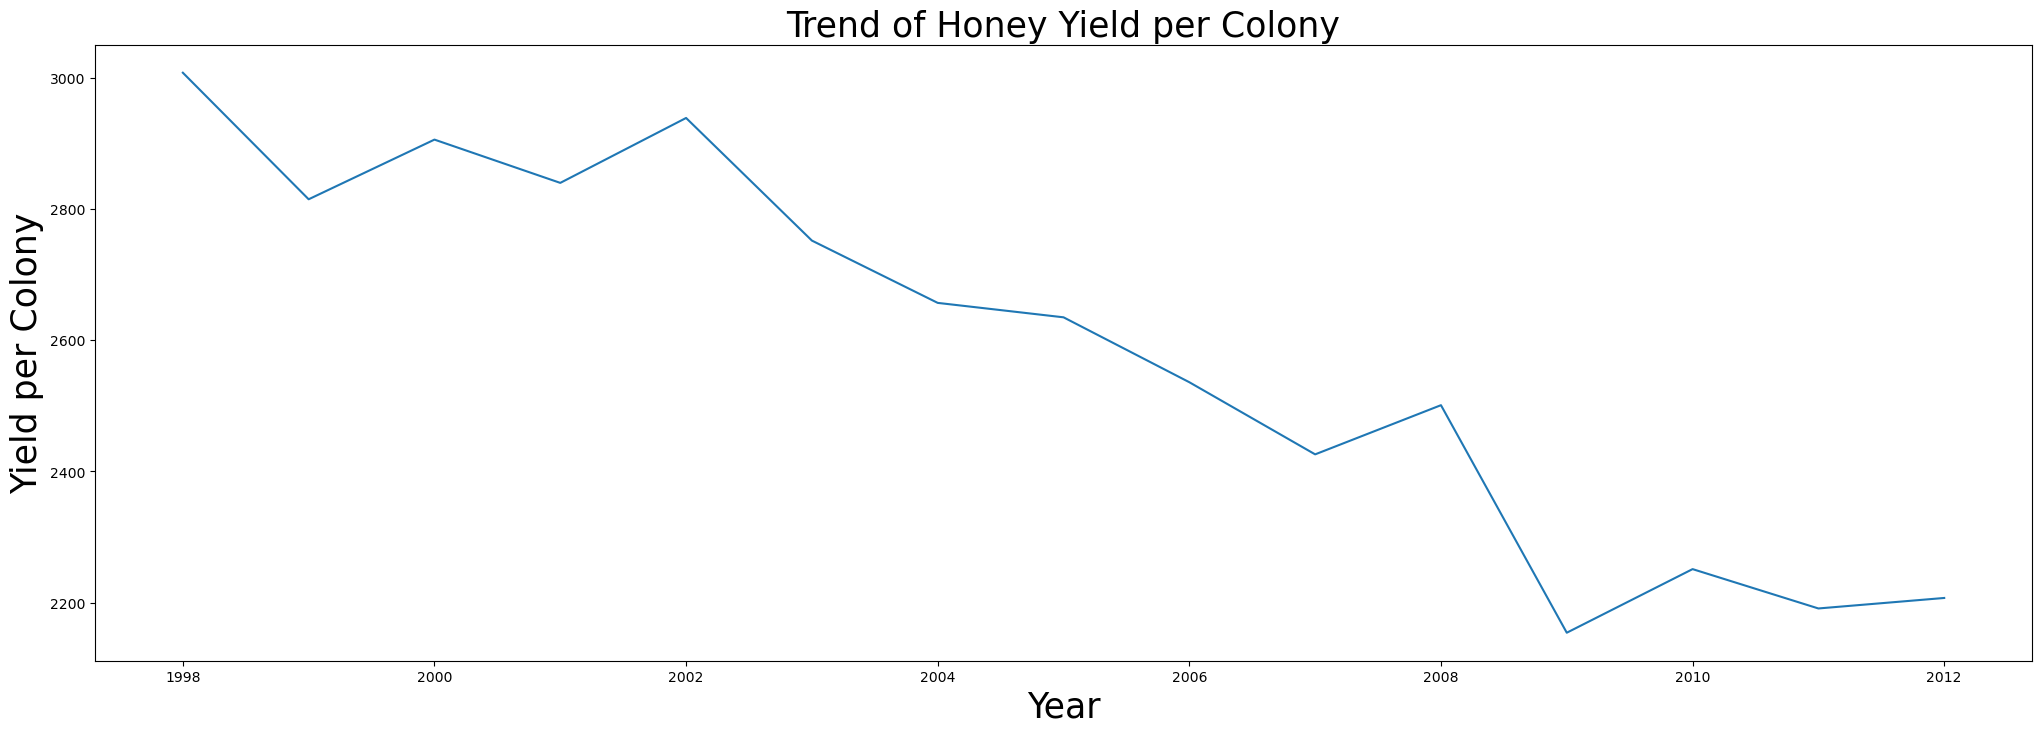

In [10]:
# Q2. Visualise the trend of Yield per Colony from year 1998 to 2012
plt.figure(figsize=(25,8))
plt.plot(hp_year['year'],hp_year['yieldpercol'])
plt.title('Trend of Honey Yield per Colony' ,fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.ylabel('Yield per Colony',fontsize = 25)

Text(0, 0.5, 'Total Production of Honey (lbs.)')

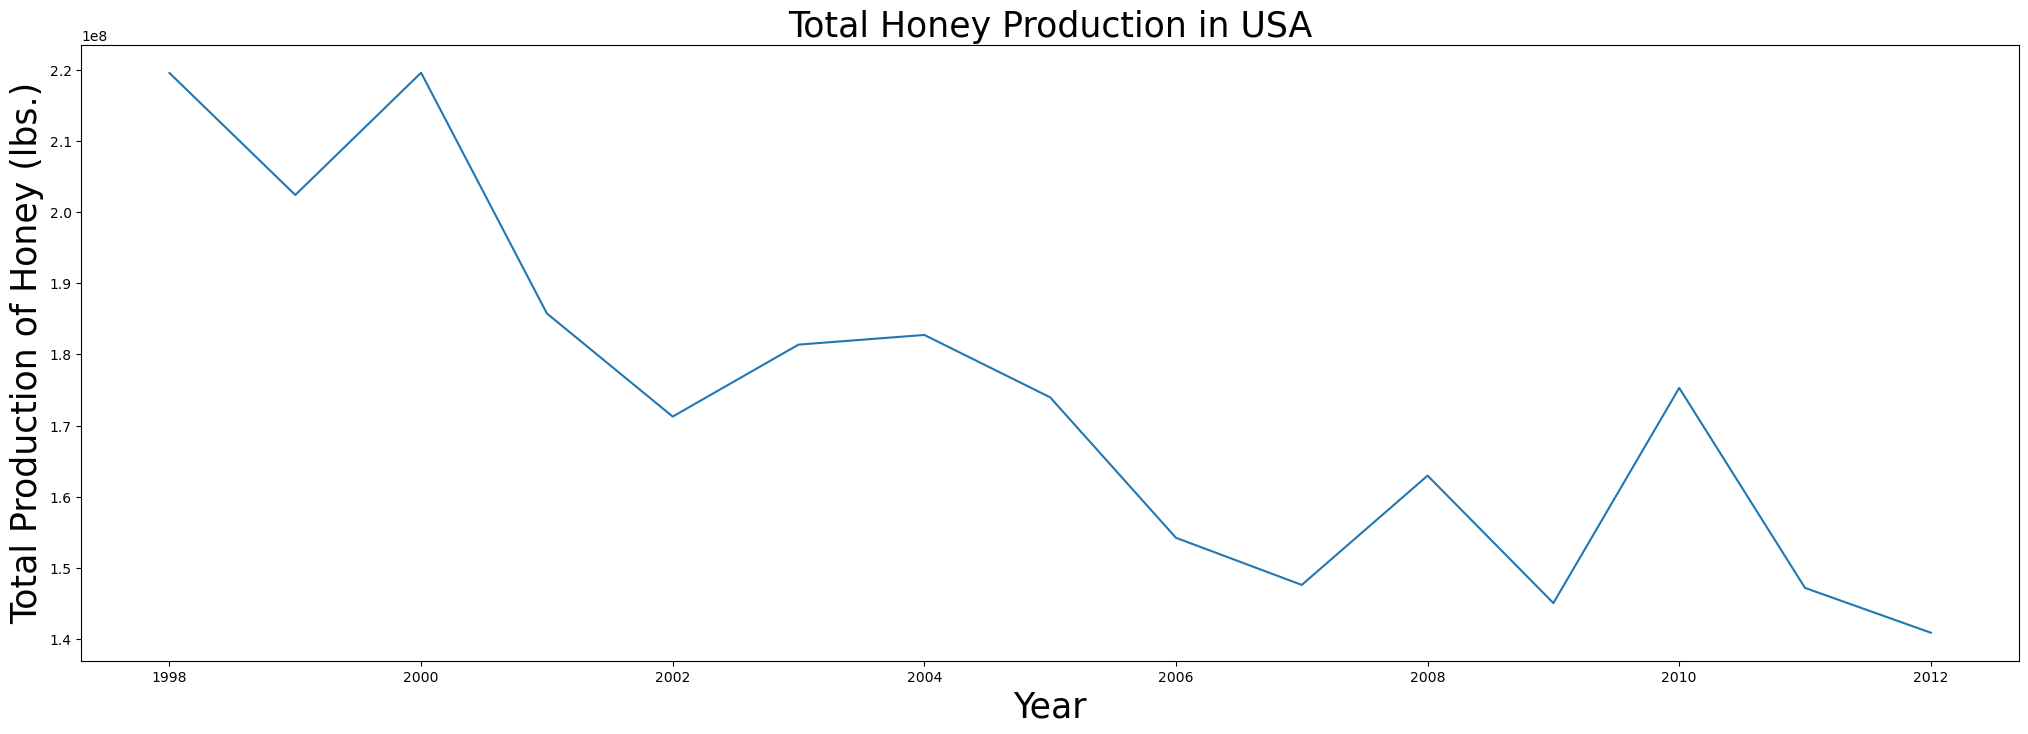

In [11]:
# Q3. Visualise the total honey production from the year 1998 to 2012.

plt.figure(figsize=(25,8))
plt.plot(hp_year['year'],hp_year['totalprod'])
plt.title('Total Honey Production in USA' ,fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.ylabel('Total Production of Honey (lbs.)',fontsize = 25)

In [12]:
# Q4. Group the dataset by state and use sum method to get the total honey production value in descending order. 

US_state = hp.groupby('state')[['state','totalprod','yieldpercol']].sum()
US_state.sort_values(by='totalprod',ascending=False,inplace=True)
US_state.reset_index(level=0,inplace=True)
US_state.head()

C:\Users\erbil\AppData\Local\Temp\ipykernel_3016\50989887.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  US_state = hp.groupby('state')[['state','totalprod','yieldpercol']].sum()


,state,totalprod,yieldpercol
0,ND,475085000.0,1321
1,CA,347535000.0,837
2,SD,266141000.0,1137
3,FL,247048000.0,1246
4,MT,156562000.0,1160


Text(0, 0.5, 'Total Production of Honey in USA')

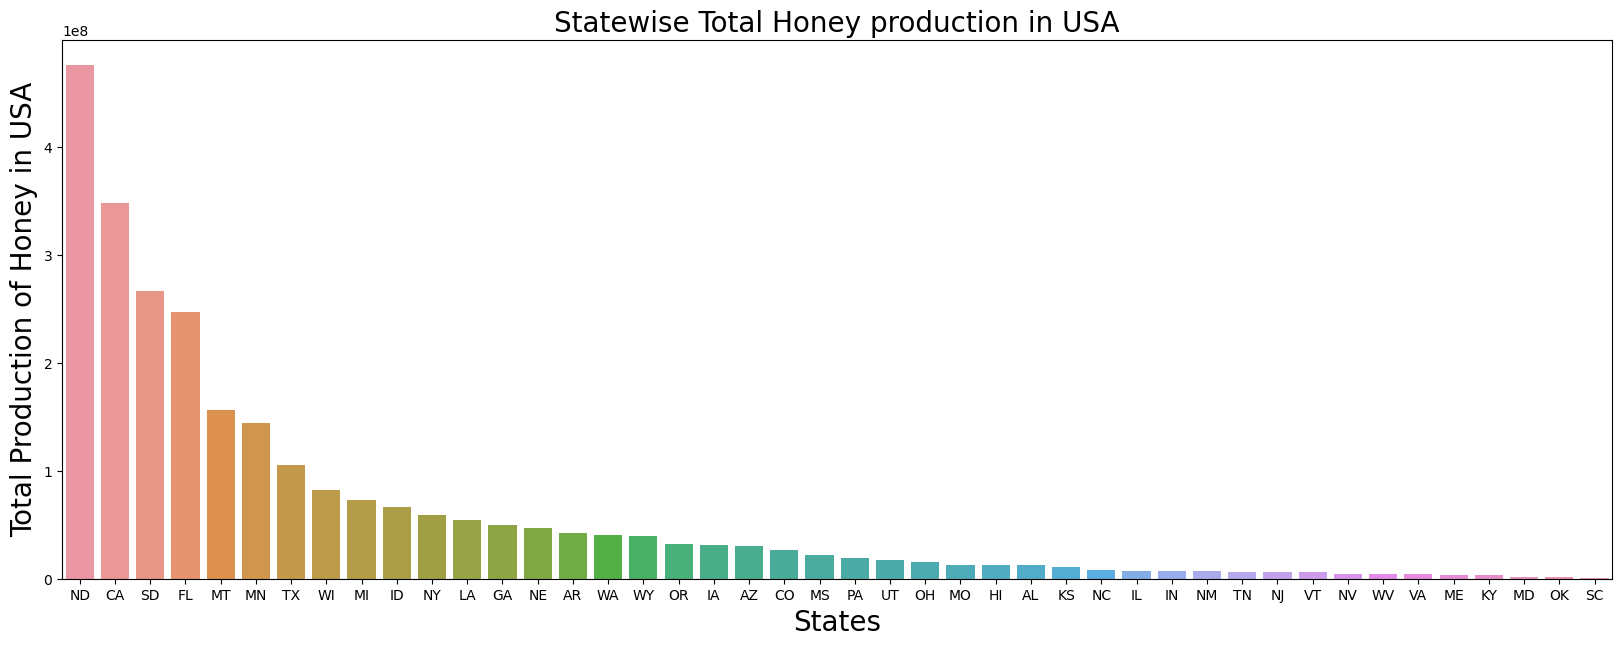

In [13]:
# Q5. Create a Bar chart to visualize the total honey production by states.

plt.figure(figsize=(20,7))
sns.barplot(x=US_state['state'],y = US_state['totalprod'])
plt.title('Statewise Total Honey production in USA',fontsize =20)
plt.xlabel('States',fontsize=20)
plt.ylabel('Total Production of Honey in USA',fontsize=20)

In [14]:
# Q6. Create a table to find out maximum production value from the states
US_state_max = hp.groupby('state')[['totalprod']].max()
US_state_max.reset_index(level=0,inplace=True)
US_state_max.columns = ['State','Max Prod']
US_state_max.head()

,State,Max Prod
0,AL,1248000.0
1,AR,4900000.0
2,AZ,3300000.0
3,CA,37350000.0
4,CO,2700000.0


In [15]:
# Q7. Create a table to find out minimum production value from the states

US_state_min = hp[['state','totalprod']].groupby('state').min()    # we can use above syntax 
US_state_min.reset_index(level=0,inplace=True)
US_state_min.columns = ['State','Min Prod']
US_state_min.head()

,State,Min Prod
0,AL,432000.0
1,AR,1368000.0
2,AZ,1012000.0
3,CA,11550000.0
4,CO,1200000.0


In [16]:
# Q8. Merge the Max Prod and Min Prod varible to find the range.
st_range = pd.merge(US_state_max,US_state_min,how='inner',on='State')
st_range.head()

,State,Max Prod,Min Prod
0,AL,1248000.0,432000.0
1,AR,4900000.0,1368000.0
2,AZ,3300000.0,1012000.0
3,CA,37350000.0,11550000.0
4,CO,2700000.0,1200000.0


In [17]:
# Q9. Create a Per_Change Column in the st_range dataset to understand honey production changes by states.
st_range['Per_Change'] = ((st_range['Max Prod']-st_range['Min Prod'])/st_range['Max Prod'])*100
st_range.sort_values(by='Per_Change',ascending=False,inplace=True)
st_range.head()

,State,Max Prod,Min Prod,Per_Change
19,MO,1725000.0,344000.0,80.057971
26,NM,960000.0,246000.0,74.375000
16,ME,451000.0,120000.0,73.392461
15,MD,308000.0,84000.0,72.727273
12,KS,1120000.0,308000.0,72.500000


Text(0, 0.5, '% Decline')

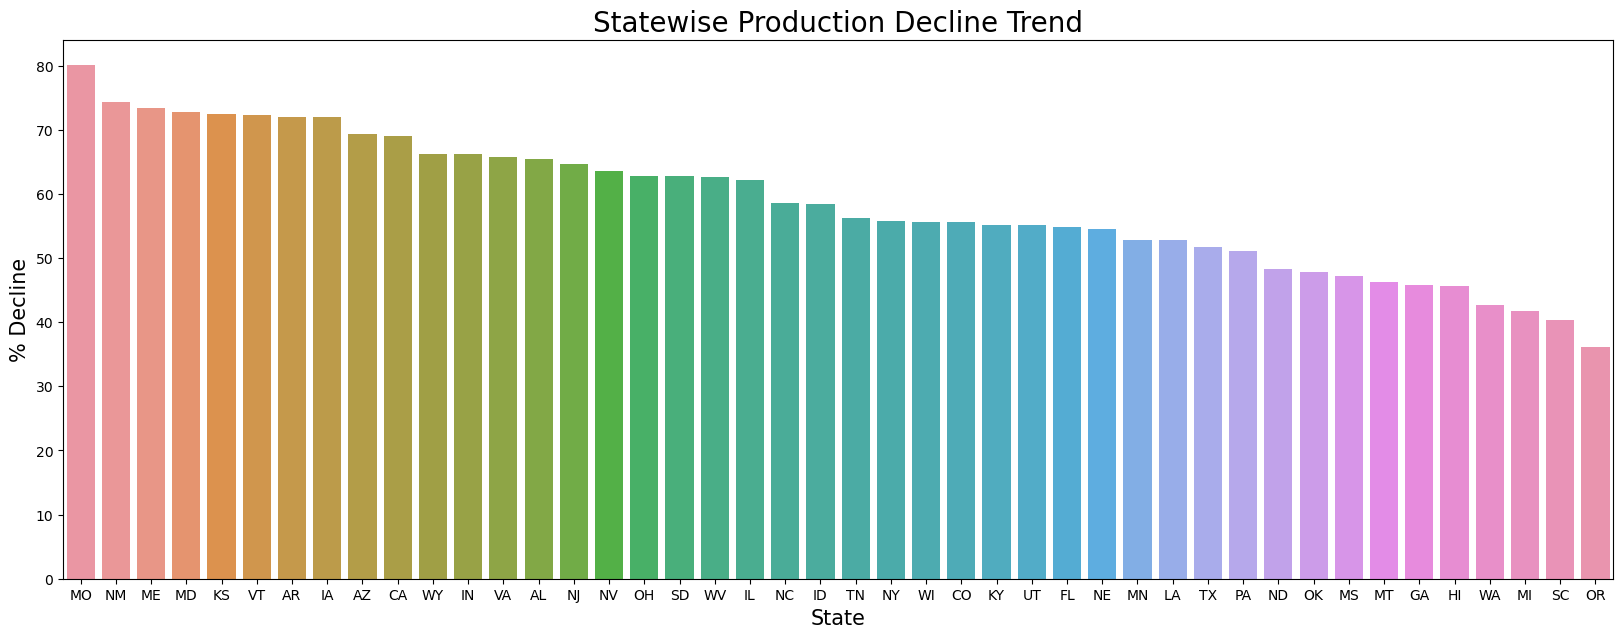

In [18]:
# Q10. Create a Bar chart to visualize the statewise decline trend.

plt.figure(figsize=(20,7))
sns.barplot(x='State',y='Per_Change',data = st_range)
plt.title('Statewise Production Decline Trend',fontsize=20)
plt.xlabel("State",fontsize=15)
plt.ylabel("% Decline",fontsize=15)

Text(0, 0.5, '% Decline')

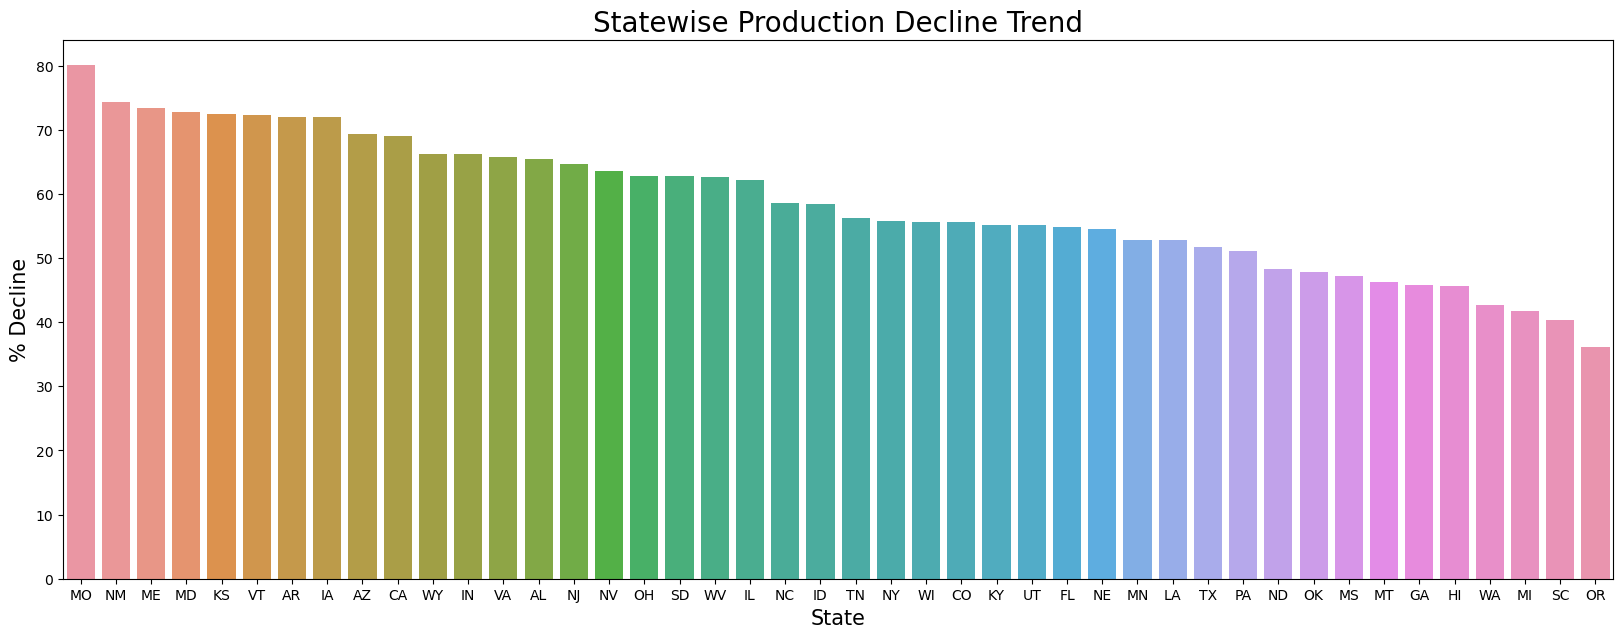

In [19]:
# OR

plt.figure(figsize=(20,7))
sns.barplot(x=st_range.State,y=st_range.Per_Change)
plt.title('Statewise Production Decline Trend',fontsize=20)
plt.xlabel("State",fontsize=15)
plt.ylabel("% Decline",fontsize=15)

In [20]:
# 11. Check the correlation between variables
honey_corr = hp[['numcol','totalprod','year','yieldpercol','stocks','prodvalue']].corr()
honey_corr

,numcol,totalprod,year,yieldpercol,stocks,prodvalue
numcol,1.000000,0.953594,0.008709,0.243515,0.825929,0.912796
totalprod,0.953594,1.000000,-0.055556,0.396252,0.878830,0.907236
year,0.008709,-0.055556,1.000000,-0.232092,-0.119602,0.139451
yieldpercol,0.243515,0.396252,-0.232092,1.000000,0.367812,0.278977
stocks,0.825929,0.878830,-0.119602,0.367812,1.000000,0.728560
prodvalue,0.912796,0.907236,0.139451,0.278977,0.728560,1.000000


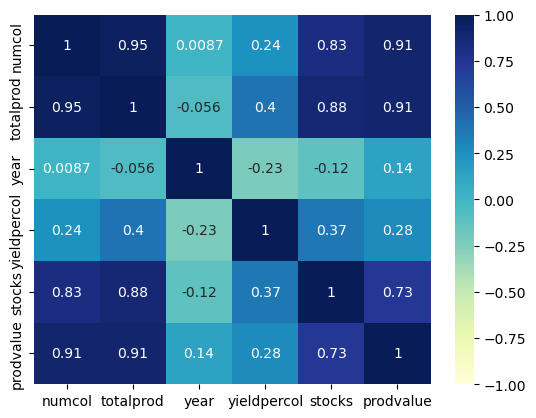

In [21]:
# 12. Visualise the same in Heatmap()
sns.heatmap(honey_corr, annot = True, vmin = -1, vmax = 1, cmap="YlGnBu")
plt.show()

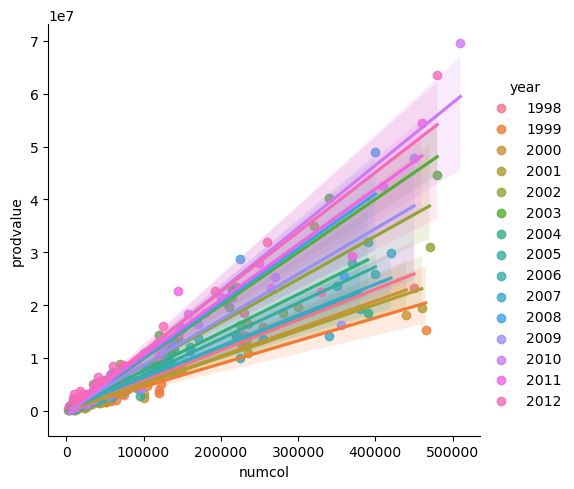

In [22]:
# 13. Checking hypothesis: "More the number of colonies, higher the production value"
sns.lmplot(x = "numcol", y = "prodvalue", data = hp, hue = 'year')
plt.show()

In [ ]:
# Q14. Create a model to predict total production.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
hp.head(3)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998


In [25]:
X_train, X_test, y_train, y_test = train_test_split(hp.drop(['totalprod', 'state'],axis=1), 
                                                    hp['totalprod'], train_size=0.80, 
                                                    random_state=8)

In [29]:
y_test

308     2891000.0
602     4161000.0
111      960000.0
92      3135000.0
481      300000.0
          ...    
405     2205000.0
89     30800000.0
219     3000000.0
30       204000.0
545     1224000.0
Name: totalprod, Length: 126, dtype: float64

In [30]:
model = LinearRegression()
model.fit(X_train.values,y_train.values)

LinearRegression()

In [31]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [32]:
# numcol yieldpercol	stocks	priceperlb	prodvalue
model.predict([[53000.0,65,3445000.0,1688000.0,0.59,2033000.0]])

array([4.03515371e+11])

In [33]:
accuracy = model.score(X_test.values, y_test.values)
print(accuracy*100,'%')

95.25114307234165 %
